# Skillbox — Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

#  1. Kiva и её деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 
Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.

## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva профинансировала 2 млн заёмщиков на сумму более 1 млрд долларов. Она считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Kiva помогла 2,7 млн нуждающихся.
* 1,7 млн небезразличных участников, желающих помочь.
* 83 страны.
* Сумма средств, финансируемых через Kiva, составляет $1,11 млрд.
* 97,0% — доля возврата средств инвесторам (очень высокий показатель).
* 81% заёмщиков Kiva — женщины.
* Кредит Kiva финансируется каждые 2 минуты.



## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Постановка задач и формулирование вопросов
***

Kiva хочет сделать так, чтобы собранные деньги тратились с максимальной пользой. В первую очередь их интересуют не дисперсия пожертвований и статистические показатели, а ощутимые выводы и рекомендации, которые позволят организации работать эффективнее и лучше понимать специфику потребностей и уровень бедности в разных странах и регионах. 

Раздел 2.1

* А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)
* Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? * Каков гендерный состав заявителей? (п. 2.4.2.)
* Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

Раздел 2.2.

* Зависимость пола заёмщика от региона планеты, сектора экономики.
* Влияние такого атрибута займа, как Количество кредиторов (lender_count), на суммы и сроки займов.
* Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
* Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе макрорегионов

## 1.4. Набор данных от Kiva
***

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита.
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD).
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD).
- sector — сектор использования займа.
- activity — более гранулированная категория.
- use — назначение использования суммы кредита.
- country_code — ISO-код страны страны, в которой был выдан заём.
- country — полное название страны, в которой был выдан кредит.
- posted_time — время, в которое заявка была опубликована на Kiva.
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму.
- funded_time — время, когда заявка полностью финансируется кредиторами.
- term_in_months — срок, на который был выдан кредит в месяцах.
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит.
- loaner_genders — разделённые запятыми буквы M, F, где каждый экземпляр представляет одного мужчину/женщину в группе.

**kiva_mpi_region_locations** — Набор данных о регионах с показателями MPI:
(Global Multidimensional Poverty Index — глобальный индекс бедности) ряда регионов (субнациональных) в мире.  Чем больше это значение, тем выше уровень бедности в соответствующем регионе. 
- country — страна.
- region — регион в стране.
- world_region — часть света.
- MPI — многомерный индекс бедности.
- geo — координаты (широта, долгота).



# Новый раздел

# Домашнее задание
***

In [15]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

import warnings
warnings.filterwarnings('ignore')

In [16]:
df_kiva_loans = pd.read_csv("../kiva/kiva_loans.csv")
df_mpi = pd.read_csv("../kiva/kiva_mpi_region_locations.csv")

In [17]:
df_kiva_loans.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01


In [18]:
df_mpi.head(2)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538


<AxesSubplot:>

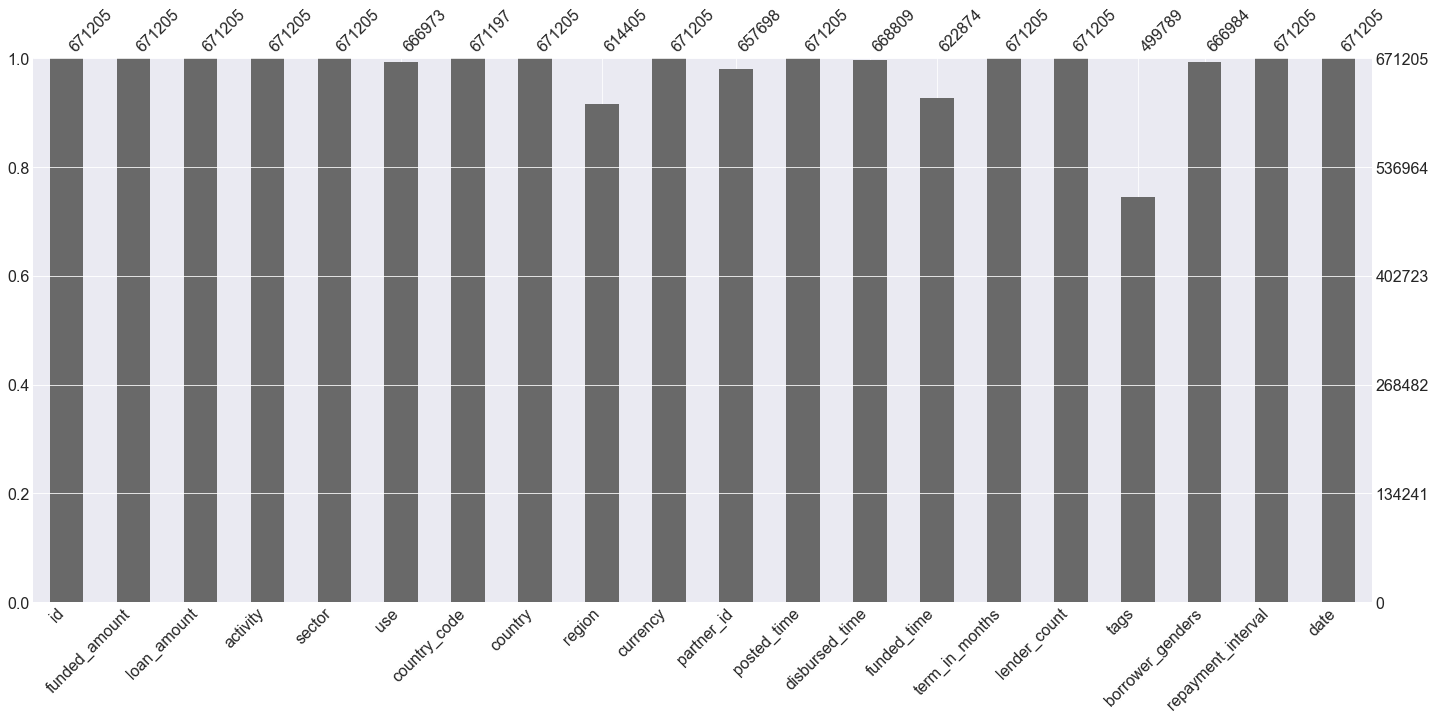

In [19]:
msno.bar(df_kiva_loans)

<AxesSubplot:>

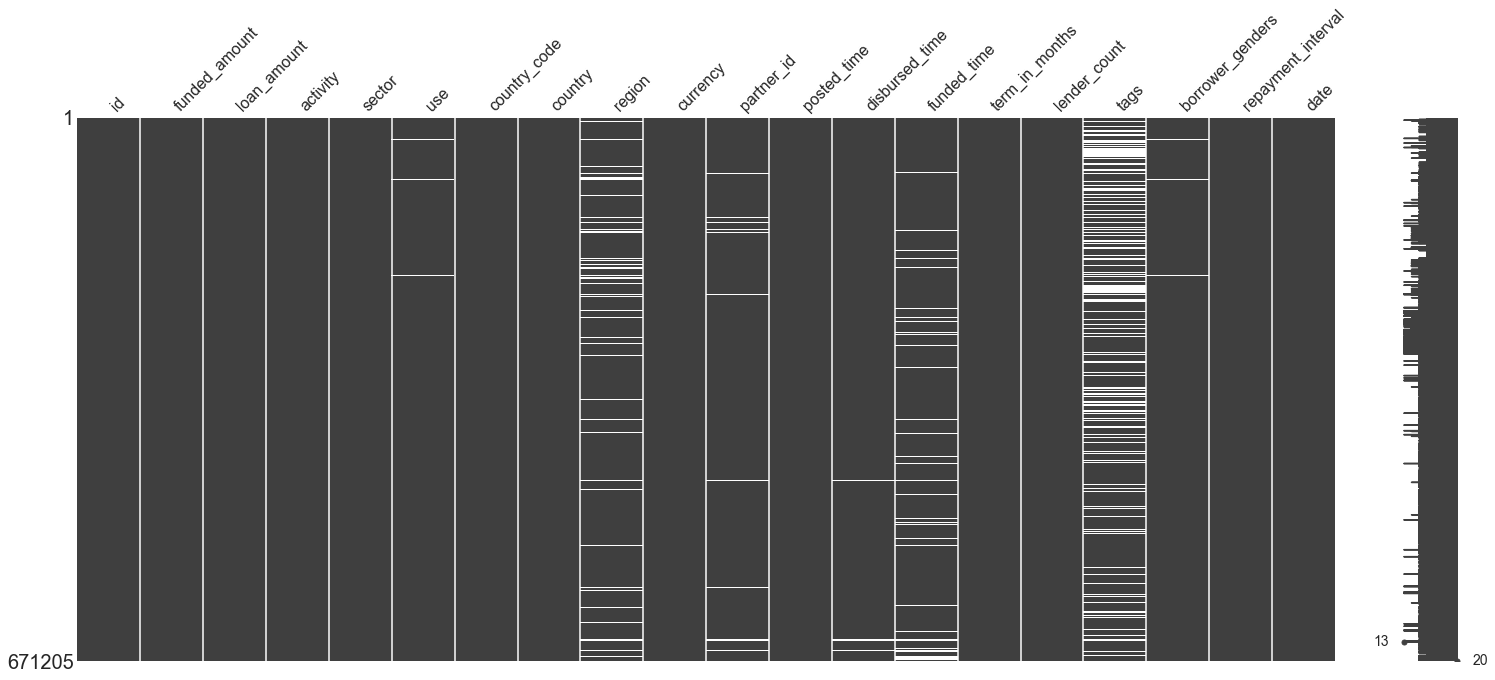

In [20]:
msno.matrix(df_kiva_loans)

In [21]:
df_kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [22]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [23]:
df_kiva_loans.describe(include=[np.object])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


**Первые очевидные результаты и выводы, которые мы можем сделать:**
* В этом датасете содержатся данные о **87** странах почти на всех континентах, где люди запрашивали помощь на финансирование проектов.
* Страной с самым большим количеством займов являются **Филиппины**.
* Наиболее популярной категорией является **сельское хозяйство**.
* Имеется довольно широкий разброс значений по ряду числовых атрибутов, таких как сумма займа, срок погашения кредита.
* В этом наборе данных **11 298** разных значений пола! Очевидно, что это невозможно. Надо обязательно попытаться понять, почему у нас такой набор значений. Помним, что для качественной аналитики нужно понимать анализируемый продукт. Поэтому ответ на этот вопрос очень важен.
* Среднее финансирование в мире составляет **786** долларов, а медианное финансирование — **450** долларов. Возможно, это означает, что существует небольшая доля заявок с крупными суммами. Стоит попытаться понять, кому и на какие нужды могли понадобиться такие суммы, а также то, насколько быстро деньги попали к заявителю после публикации заявки.
* Что ещё более важно: есть только 1298 различных дат, в которые были опубликованы заявки на кредиты. Если мы подсчитаем соотношение, то это означает, что в Kiva ежедневно выдаётся более **500** займов. Это даёт нам чёткое представление о том, насколько важна эта краудсорсинговая платформа и какое влияние она оказывает.


## 2.1. Самостоятельная работа
***

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)
- Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

# А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)

In [24]:
df_gender_issue = df_kiva_loans[['country', 'borrower_genders']].set_index('country').dropna()

### Определим общее количество заемщиков:

In [25]:
total_borrowers = df_kiva_loans['borrower_genders'].count()
total_borrowers # общее количество заемщиков

666984

### Рассмотрим общее колиество заемщиков женщин, мужчин и групп:

In [26]:
def f_gender_group(x):
    x = str(x)
    if (x == 'female') | (x == 'male'):
        pass
    elif (x == None) | (x == 0):
        x = 0
    elif ('female' in x) | ('male' in x):
        x = 'group'
    else:
        x = 0
    return x

df_gender_issue['borrower_genders'] = df_gender_issue['borrower_genders'].apply(f_gender_group)

Общее количество заемщиков- женщин: total_borrowers_female =  426502
Общее количество заемщиков- мужчин: total_borrowers_male =  134710
Общее количество заемщиков- групп: total_borrowers_group =  105772
666984


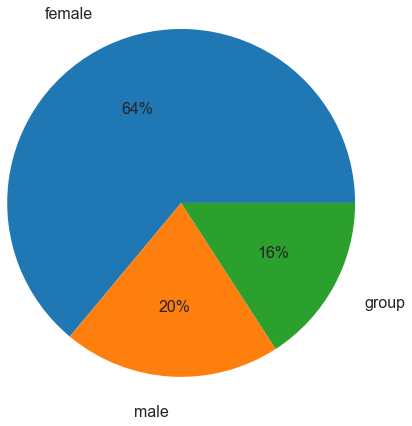

In [27]:
total_borrowers_female = df_gender_issue['borrower_genders'][df_gender_issue['borrower_genders'] == 'female'].count()
print('Общее количество заемщиков- женщин: total_borrowers_female = ', total_borrowers_female)
total_borrowers_male = df_gender_issue['borrower_genders'][df_gender_issue['borrower_genders'] == 'male'].count()
print('Общее количество заемщиков- мужчин: total_borrowers_male = ', total_borrowers_male)
total_borrowers_group = df_gender_issue['borrower_genders'][df_gender_issue['borrower_genders'] == 'group'].count()
print('Общее количество заемщиков- групп: total_borrowers_group = ', total_borrowers_group)
print(total_borrowers_group + total_borrowers_male + total_borrowers_female) # контрольная сумма

borrowers = df_gender_issue['borrower_genders'].value_counts()
plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

Сразу бросается в глаза, что количество заемщиков-женщин сзанчительно больше, чем всех остальных заемщиков вместе взятых.

Исключим из рассмотрения страны, совокупное количество обращений в которых составляет менее 5% от всего объема заявок KIVA

In [28]:
special_serie = df_gender_issue.groupby('country').count().sort_values(by=['borrower_genders'])
i_1 = 0
k_1 = 1
while i_1 / special_serie['borrower_genders'].sum() < 0.05:
    i_1 += special_serie['borrower_genders'][k_1]
    k_1 += 1
special_serie = special_serie[special_serie['borrower_genders'] > special_serie['borrower_genders'][k_1]]
countries = special_serie.index

In [29]:
df_gender_issue_per = \
    df_gender_issue[df_gender_issue.index.isin(countries.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)
df_gender_issue_group = df_gender_issue_per.sort_values(by=['group'])[-10:]
df_gender_issue_m = df_gender_issue_per.sort_values(by=['male'])[-10:]
df_gender_issue_f = df_gender_issue_per.sort_values(by=['female'])[-10:]

In [30]:
df_gender_issue_value = \
    df_gender_issue[df_gender_issue.index.isin(countries.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .unstack('borrower_genders')\
    .fillna(0)
df_gender_issue_group_value = df_gender_issue_value.sort_values(by=['group'])[-10:]
df_gender_issue_m_value = df_gender_issue_value.sort_values(by=['male'])[-10:]
df_gender_issue_f_value = df_gender_issue_value.sort_values(by=['female'])[-10:]

Построим диаграммы странн в которых наибольший процент заемщиков мужчин, женщин и групп (по 10 стран с наибольшим процентом каждой гендерной группы)

In [31]:
df_gender_issue_m

borrower_genders,female,group,male
country,,,
Jordan,64.018353,1.207438,34.774209
Mexico,35.019455,29.678104,35.302441
Armenia,62.389893,0.000000,37.610107
Colombia,60.599491,0.000000,39.400509
El Salvador,59.599196,0.048320,40.352483
United States,56.463846,0.101129,43.435024
Mozambique,51.124567,0.288351,48.587082
Uganda,40.289358,10.505150,49.205493
Palestine,35.279686,0.000000,64.720314


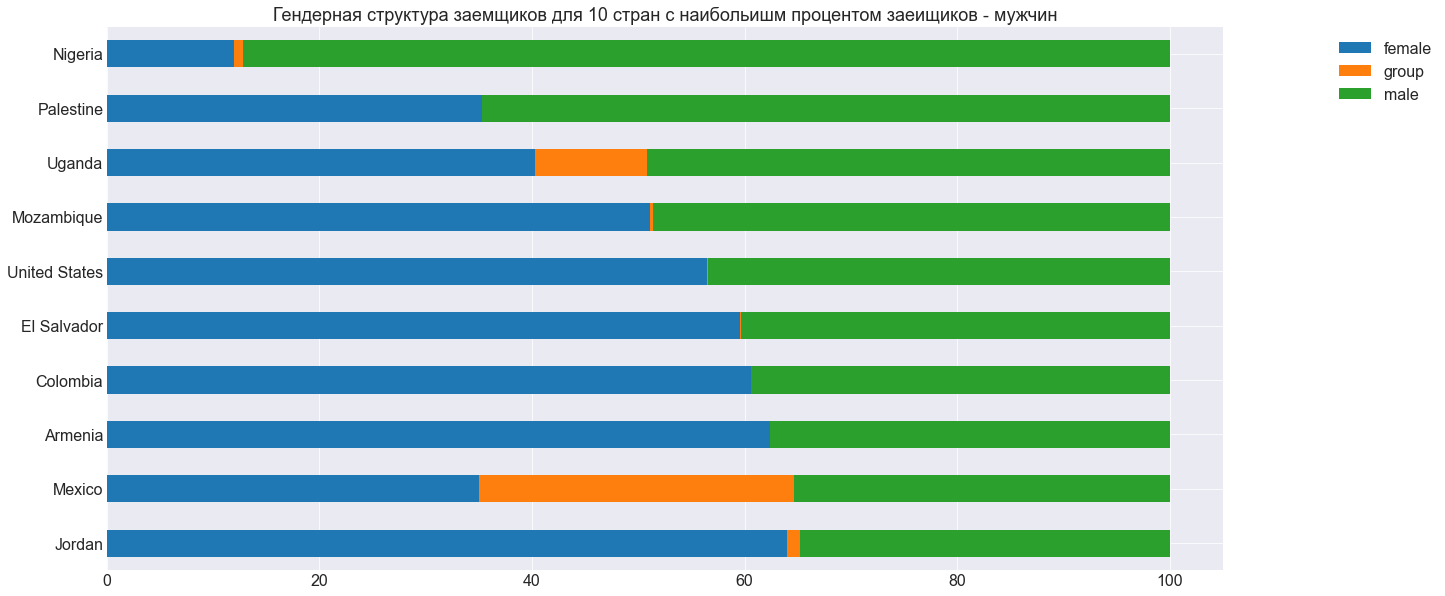

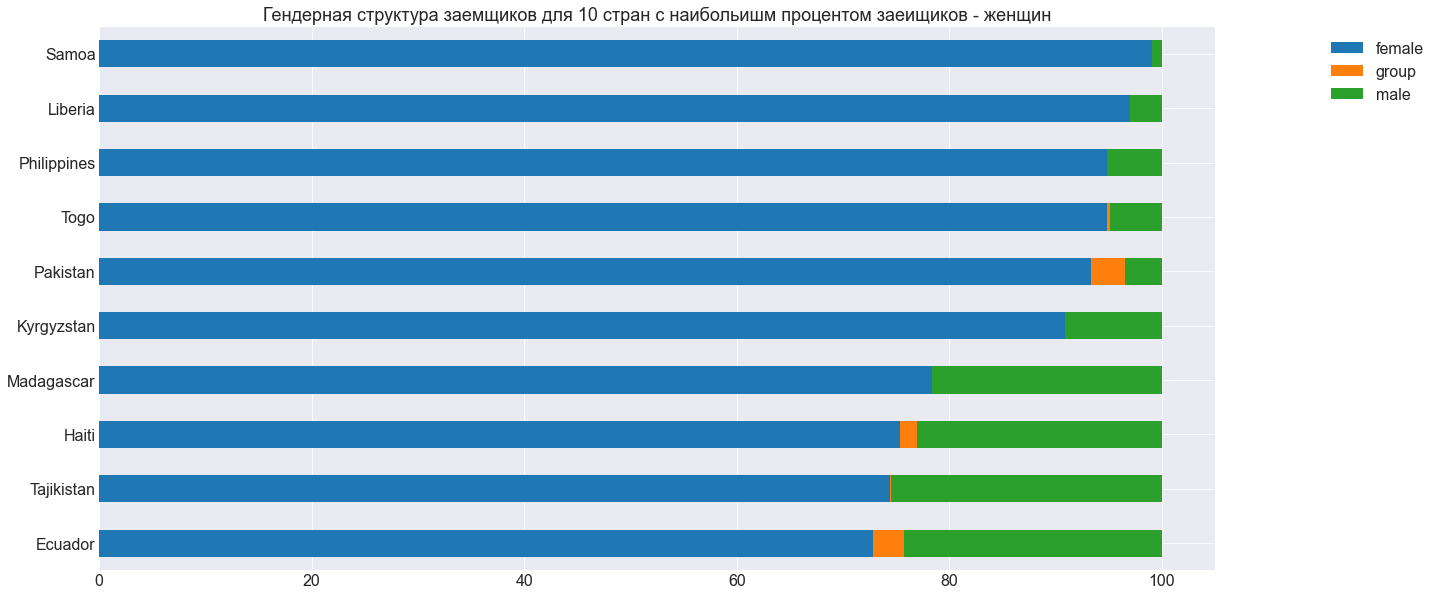

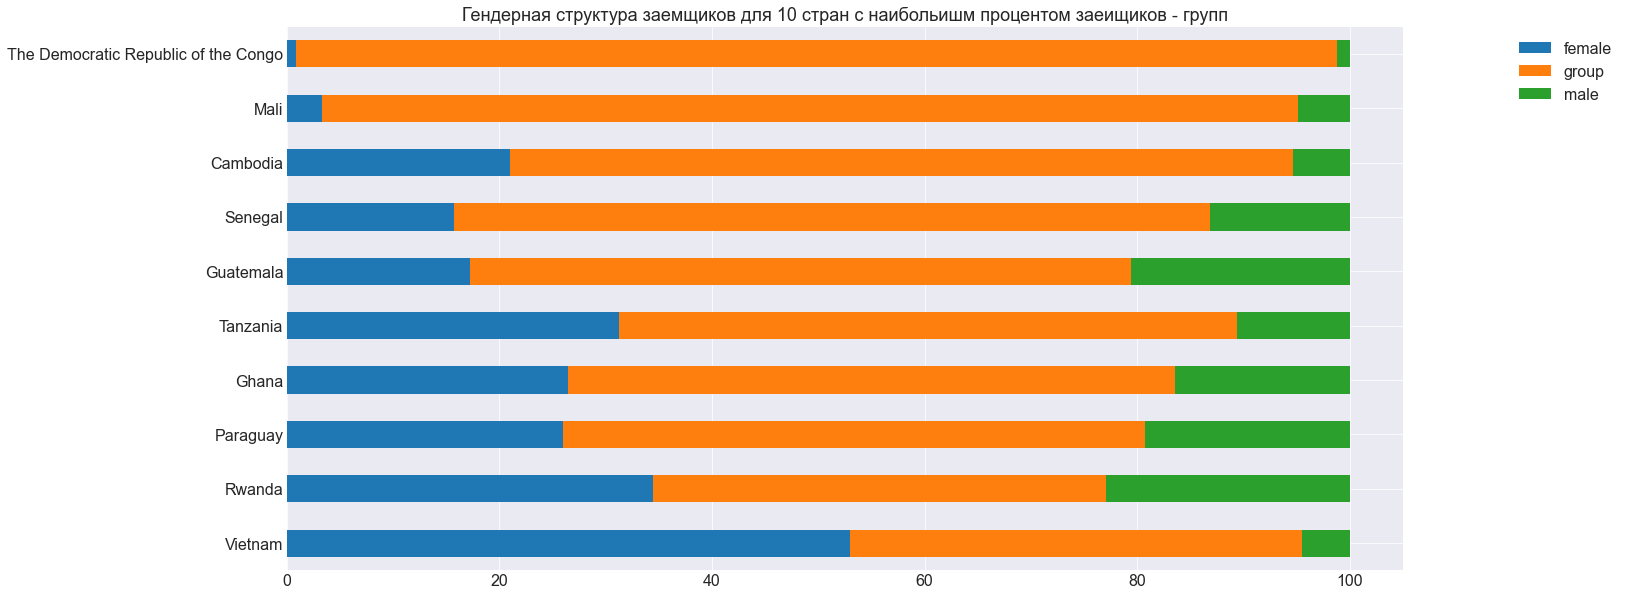

In [32]:
plot = df_gender_issue_m.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков для 10 стран с наибольишм процентом заеищиков - мужчин')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

plot = df_gender_issue_f.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков для 10 стран с наибольишм процентом заеищиков - женщин')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

plot = df_gender_issue_group.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков для 10 стран с наибольишм процентом заеищиков - групп')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Анализ показывает, что наибольший % мужчин среди заёмщиков в наблюдается следующих странах (по возврастанию процента):

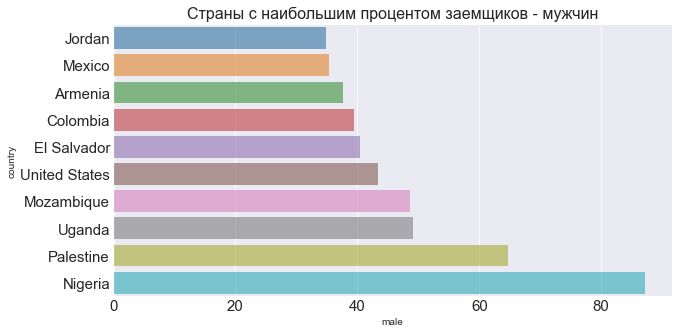

In [33]:
plt.figure(figsize=(10,5))
plt.title("Страны с наибольшим процентом заемщиков - мужчин", fontsize=16)
plt.tick_params(labelsize=15)
sns.barplot(y=df_gender_issue_m.index, x=df_gender_issue_m['male'], alpha=0.6)
plt.show()

При этом во многих этих странах процен заемщиков мужчин остается ниже чем женщин. Если оставить только те страны из этого перечня, где % мужчин выше, то получится следующий список:

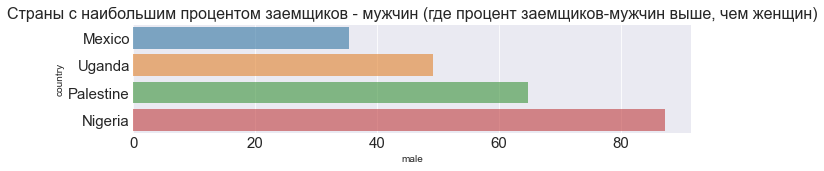

In [34]:
plt.figure(figsize=(10,2))
plt.title("Страны с наибольшим процентом заемщиков - мужчин (где процент заемщиков-мужчин выше, чем женщин)", fontsize=16)
plt.tick_params(labelsize=15)
sns.barplot(y=df_gender_issue_m[df_gender_issue_m['male'] > df_gender_issue_m['female']].index,
            x=df_gender_issue_m[df_gender_issue_m['male'] > df_gender_issue_m['female']]['male'],
            alpha=0.6)
plt.show()

Если рассмотреть абсолютное количество мужчин заемщиков для этих стран и их процент от общего количество мужчин заемщиков на платформе KIVA, а также от всего количества заемщиков на платформе, то получим следующую картину:

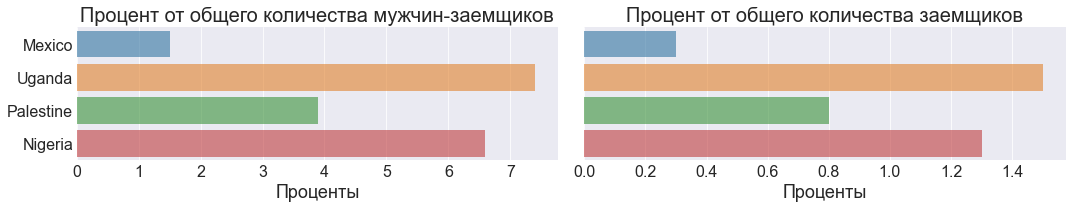

In [35]:
seria_male_value_1 = df_gender_issue_value.loc[df_gender_issue_m[df_gender_issue_m['male'] > df_gender_issue_m['female']].index]
seria_male_value_1['per_from_total_man_value'] = seria_male_value_1['male'] / total_borrowers_male * 100
seria_male_value_1['per_from_total_man_value'] = seria_male_value_1['per_from_total_man_value'].round(decimals=1)
seria_male_value_1['per_from_total_borrower_value'] = seria_male_value_1['male'] / total_borrowers * 100
seria_male_value_1['per_from_total_borrower_value'] = seria_male_value_1['per_from_total_borrower_value'].round(decimals=1)

f,ax=plt.subplots(1, 2, sharey=True, figsize=(15,3))

sns.barplot(y=seria_male_value_1.index, x=seria_male_value_1['per_from_total_man_value'], alpha=0.6, ax=ax[0])
ax[0].set_title("Процент от общего количества мужчин-заемщиков", fontsize=20)
ax[0].set_xlabel('Проценты', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=seria_male_value_1.index, x=seria_male_value_1['per_from_total_borrower_value'], alpha=0.6, ax=ax[1])
ax[1].set_title("Процент от общего количества заемщиков", fontsize=20)
ax[1].set_xlabel('Проценты', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Важно, не только страны с наибольшим процентом заемщиков мужчин, но и страны с наибольшим абсолютным значением заемщиков мужчин. По абссолютному значению количества заёмщиков, наибольшее количесво мужчин среди заемщиков встречается в следующих странах (по возврастанию количества)

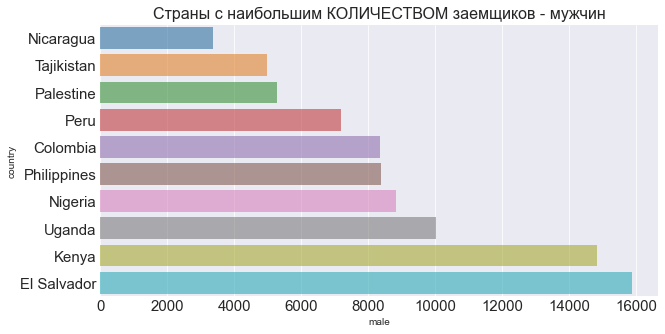

In [36]:
df_gender_issue_m_value

plt.figure(figsize=(10,5))
plt.title("Страны с наибольшим КОЛИЧЕСТВОМ заемщиков - мужчин", fontsize=16)
plt.tick_params(labelsize=15)
sns.barplot(y=df_gender_issue_m_value.index, x=df_gender_issue_m_value['male'], alpha=0.6)
plt.show()

отбросим страны, где количество заемщиков женщин выше и рассмотрим % от общего количества заемщиков мужчин и просто от общего количества заемщиков:

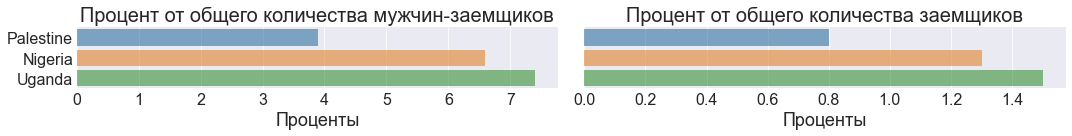

In [37]:
seria_male_value_2 = df_gender_issue_m_value.loc[
    df_gender_issue_m_value[
        df_gender_issue_m_value['male'] > df_gender_issue_m_value['female']
    ].index
]
seria_male_value_2['%_from_total_man_value'] = seria_male_value_2['male'] / total_borrowers_male * 100
seria_male_value_2['%_from_total_man_value'] = seria_male_value_2['%_from_total_man_value'].round(decimals=1)
seria_male_value_2['%_from_total_borrower_value'] = seria_male_value_2['male'] / total_borrowers * 100
seria_male_value_2['%_from_total_borrower_value'] = seria_male_value_2['%_from_total_borrower_value'].round(decimals=1)
seria_male_value_2

f,ax=plt.subplots(1, 2, sharey=True, figsize=(15,2))

sns.barplot(y=seria_male_value_2.index, x=seria_male_value_2['%_from_total_man_value'], alpha=0.6, ax=ax[0])
ax[0].set_title("Процент от общего количества мужчин-заемщиков", fontsize=20)
ax[0].set_xlabel('Проценты', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=seria_male_value_2.index, x=seria_male_value_2['%_from_total_borrower_value'], alpha=0.6, ax=ax[1])
ax[1].set_title("Процент от общего количества заемщиков", fontsize=20)
ax[1].set_xlabel('Проценты', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

## Заключение по странам, где преобладают мужчины-заемщики:

### Групповые заемщики преобладают по проценту в следующих странах:

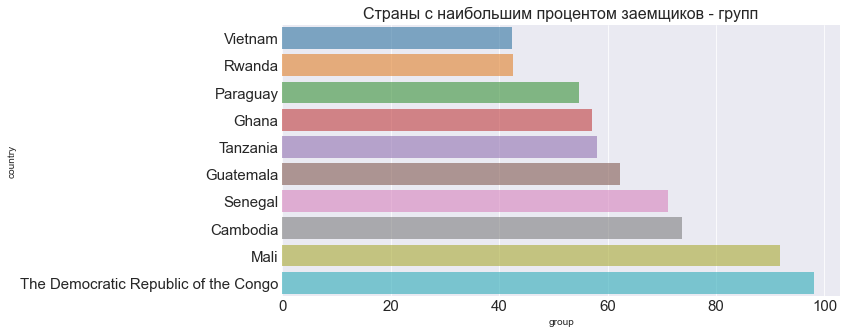

In [38]:
df_gender_issue_group

plt.figure(figsize=(10,5))
plt.title("Страны с наибольшим процентом заемщиков - групп", fontsize=16)
plt.tick_params(labelsize=15)
sns.barplot(y=df_gender_issue_group.index, x=df_gender_issue_group['group'], alpha=0.6)
plt.show()

А по абсолтному количеству:

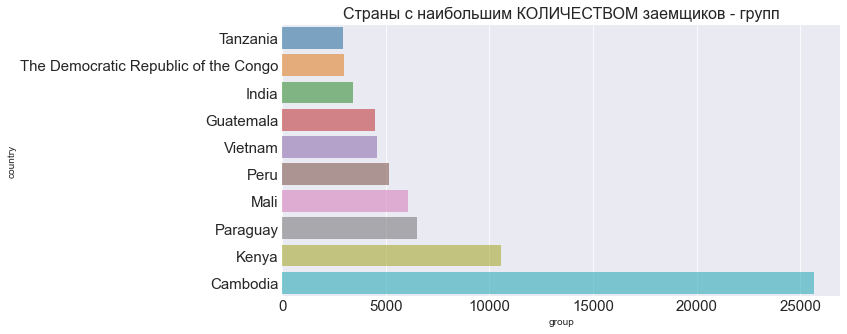

In [39]:
df_gender_issue_group_value

plt.figure(figsize=(10,5))
plt.title("Страны с наибольшим КОЛИЧЕСТВОМ заемщиков - групп", fontsize=16)
plt.tick_params(labelsize=15)
sns.barplot(y=df_gender_issue_group_value.index, x=df_gender_issue_group_value['group'], alpha=0.6)
plt.show()

## Заключение по странам, где преобладают мужчины-группы:

# Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)

Рассмотрим величины заявок, которые делают на платформе.
Выбере 5 крупнейших сумм:

In [40]:
loan_amount_list = sorted(pd.unique(df_kiva_loans['loan_amount']).tolist())
loan_amount_list[-5:]

[49750.0, 49925.0, 49950.0, 50000.0, 100000.0]

Определим, сколько было всего заявок на две самые большие суммы:

In [41]:
df_kiva_loans[['activity', 'sector', 'use', 'country', 'loan_amount', 'borrower_genders']] \
    .sort_values(by=['loan_amount'])[df_kiva_loans['loan_amount'] >= 100000].shape

(1, 6)

In [42]:
max_loan_data = df_kiva_loans[['activity', 'sector', 'use', 'country', 'loan_amount', 'borrower_genders']] \
    .sort_values(by=['loan_amount'])[df_kiva_loans['loan_amount'] >= 5000]
max_loan_data.shape

(11683, 6)

В представленных данных всего один наиболее дорогой займ на 100 000 и 11682 займа на 50 000.
Самый дорогой займ был под сельскохозяйственные цели на Гаити.
Назначение было следующее:

In [43]:
pd.set_option('display.max_colwidth', -1)
print(max_loan_data['use'][max_loan_data['loan_amount'] == 100000])

70499    create more than 300 jobs for women and farmers in rural Haiti.
Name: use, dtype: object


т.е. создание 300 рабочих мест для женщин фермеров на Гаити.

Определим распределение крупных займов по активности (20 самых частых видов):

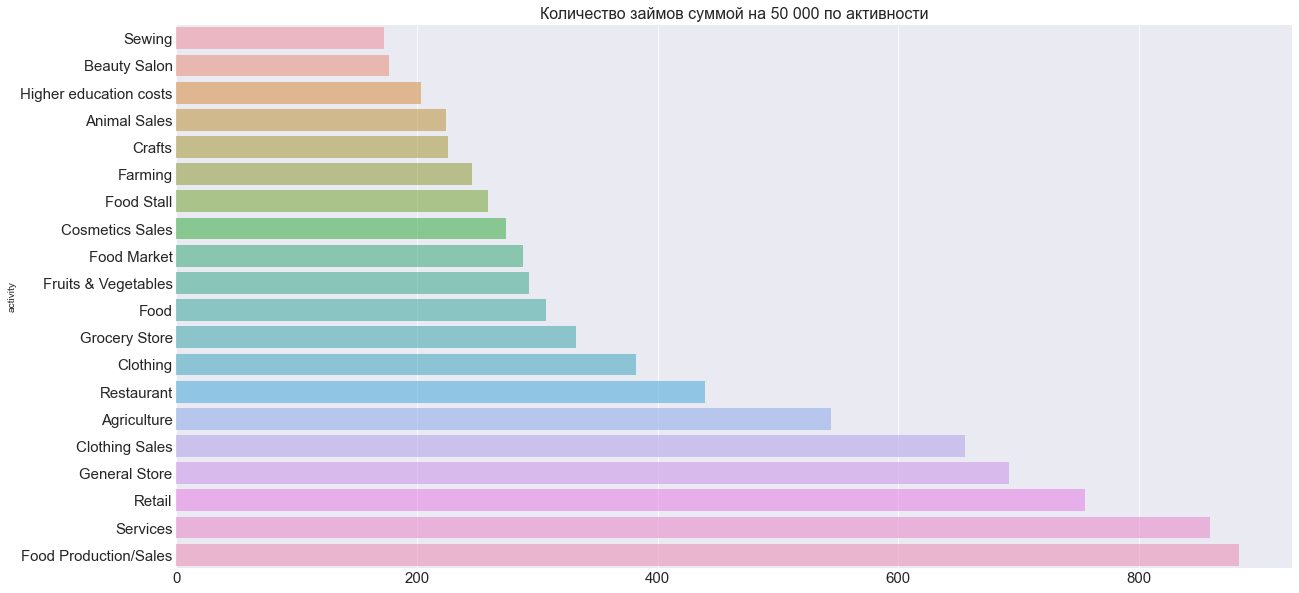

In [44]:
max_loan_data = max_loan_data[df_kiva_loans['loan_amount'] < 100000]
max_loan_activity = max_loan_data.groupby('activity')['country'].count().sort_values()[-20:]
plt.figure(figsize=(20,10))
plt.title("Количество займов суммой на 50 000 по активности", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=max_loan_activity.index, x=max_loan_activity.values, alpha=0.6)
plt.show()

Самым частым является производство или продажа еды

Распределение крупных займов по сектору (20 самых частых видов):

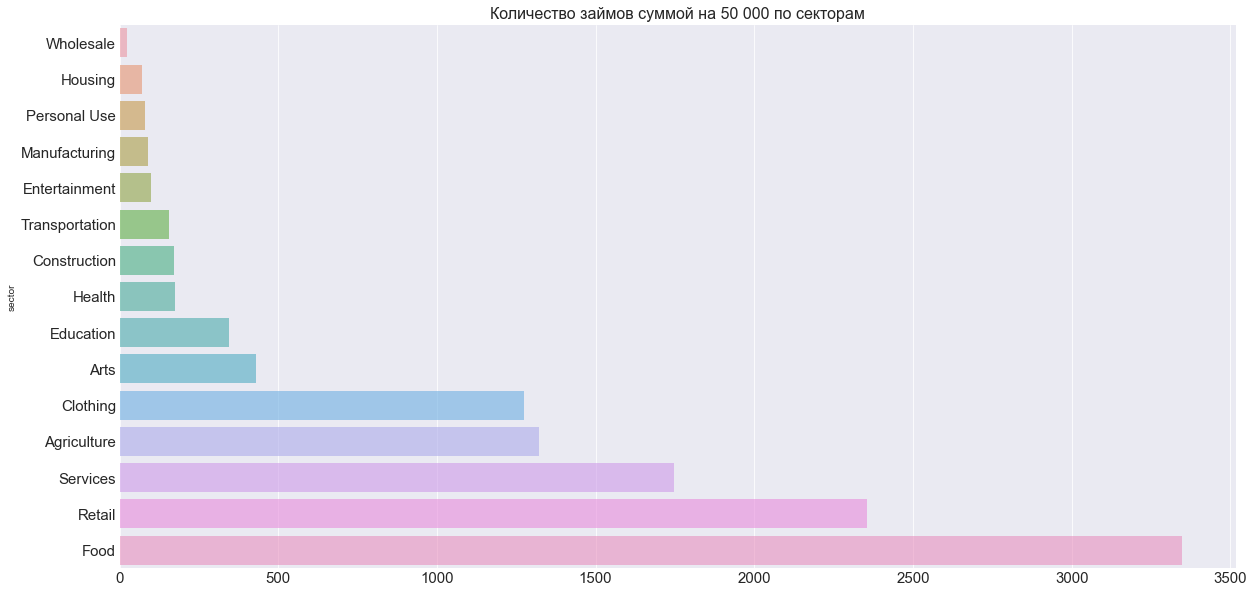

In [45]:
max_loan_sector = max_loan_data.groupby('sector')['country'].count().sort_values()[-20:]
plt.figure(figsize=(20,10))
plt.title("Количество займов суммой на 50 000 по секторам", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=max_loan_sector.index, x=max_loan_sector.values, alpha=0.6)
plt.show()

Самым частым является еда

Распределение крупных займов по странам (20 самых частых стран):

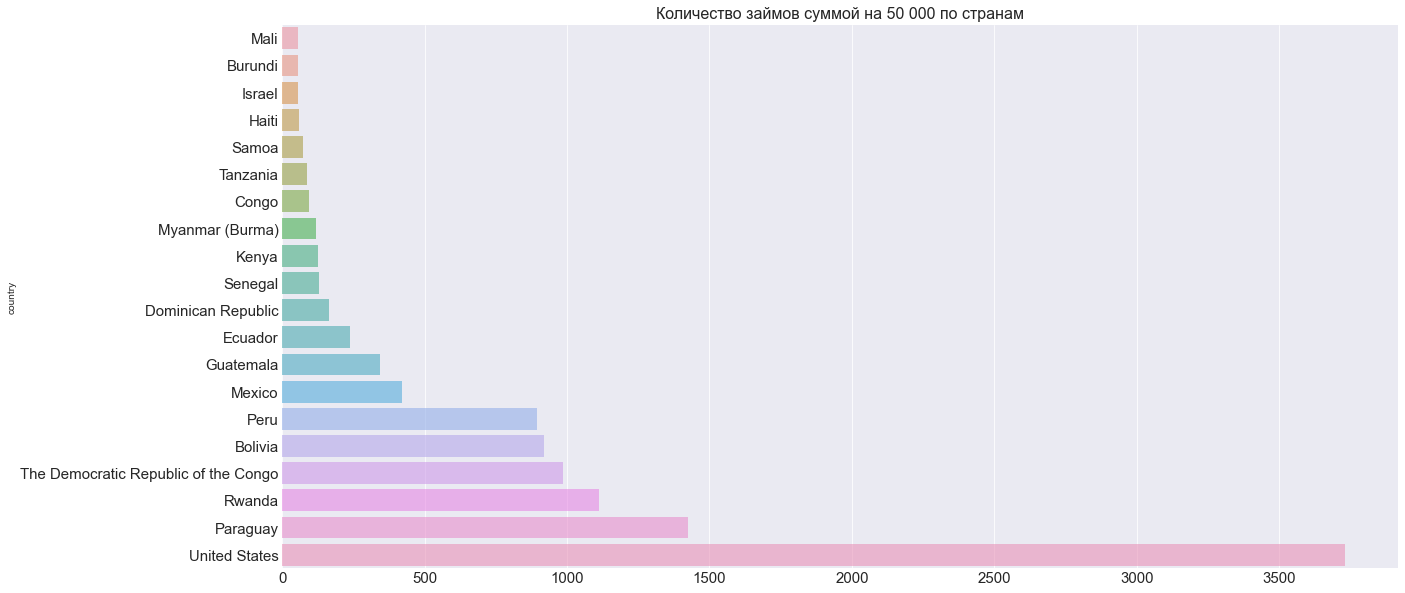

In [46]:
max_loan_country = max_loan_data.groupby('country')['country'].count().sort_values()[-20:]
plt.figure(figsize=(20,10))
plt.title("Количество займов суммой на 50 000 по странам", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=max_loan_country.index, x=max_loan_country.values, alpha=0.6)
plt.show()

Чаще всего бобльшие займы берут в США

Распределение крупных займов по гендеру заемщиков:

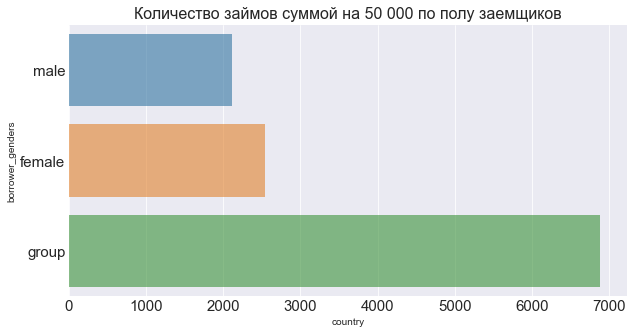

In [47]:
max_loan_gender = max_loan_data[['country', 'borrower_genders']].dropna()
max_loan_gender['borrower_genders'] = max_loan_gender['borrower_genders'].apply(f_gender_group)
max_loan_gender = max_loan_gender.groupby('borrower_genders').count().sort_values(by='country')
plt.figure(figsize=(10,5))
plt.title("Количество займов суммой на 50 000 по полу заемщиков", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=max_loan_gender.index, x=max_loan_gender['country'], alpha=0.6)
plt.show()

Больше всего большие займы берут группы заемщиков.

### Заключение по крупным займам:

# Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

In [48]:
# df_kiva_loans.head(2)

### Определим распределение сумм займов по макрорегионам:

In [49]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

In [50]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')

In [51]:
regions = df_kiva_loans['world_region'].value_counts()

In [52]:
# Наблюдаемое отклонение от среднего
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()
# Стандартное отклонение
std = df_kiva_loans['loan_amount'].std()
# Фильтруем исходный набор данных
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

regions = df_kiva_loans['world_region'].value_counts()
regions_list = regions.index.to_list()

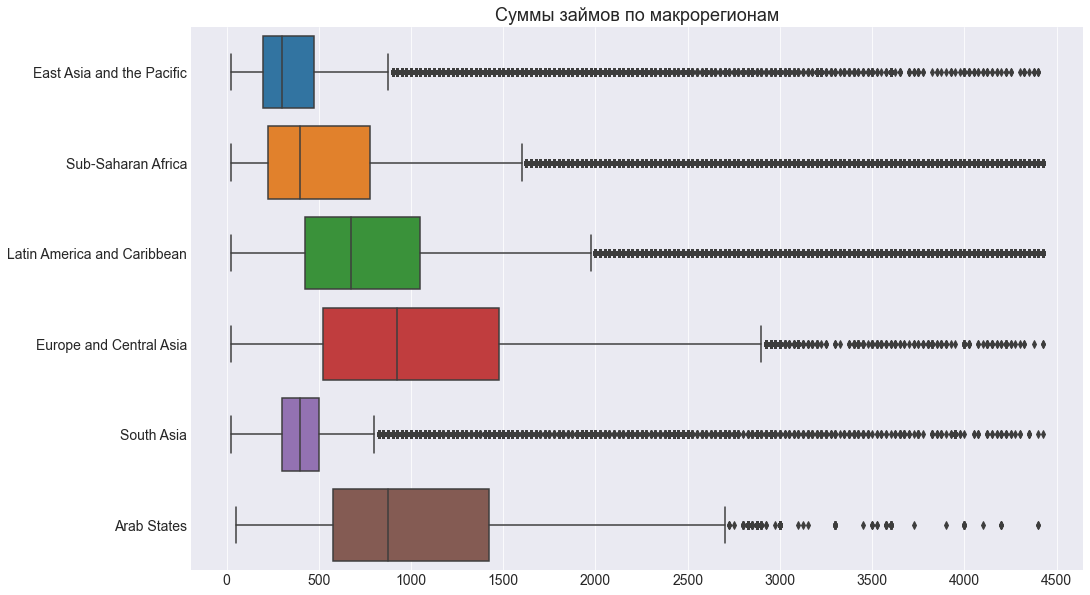

In [53]:
plt.figure(figsize=(16,10))
plt.title("Суммы займов по макрорегионам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions_list, data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)
# plt.legend(loc=1, bbox_to_anchor=(1.15, 1), fontsize=16)
plt.show()

### Разделим распределения по полам заемщиков в пределах макрорегионов:

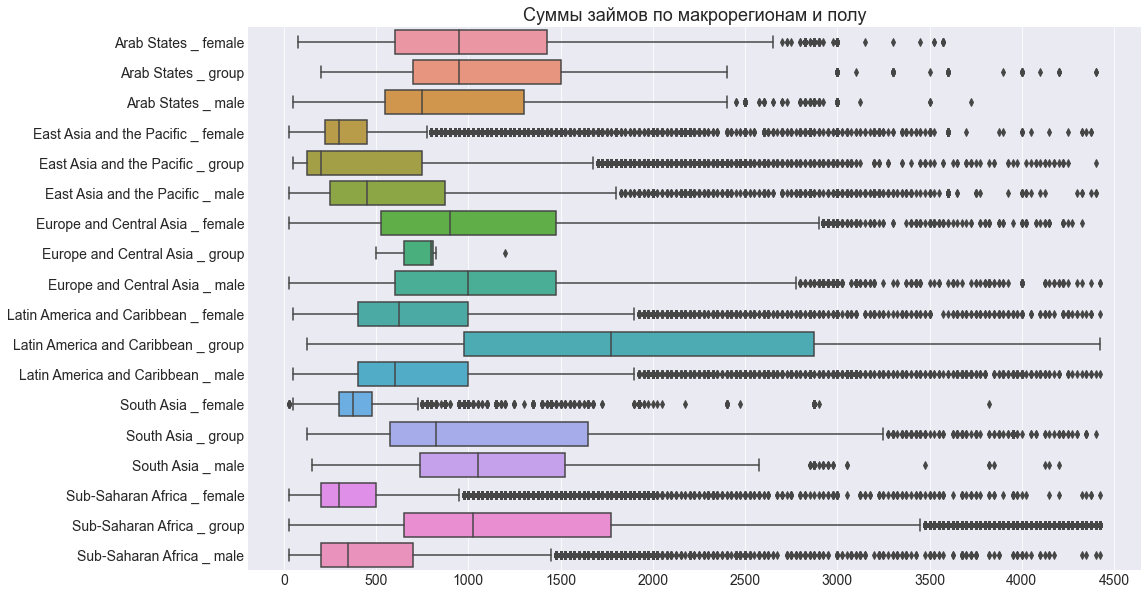

In [54]:
df_kiva_loans_trimmed_gender = df_kiva_loans_trimmed[['world_region', 'loan_amount', 'borrower_genders']].dropna()
df_kiva_loans_trimmed_gender['borrower_genders'] = df_kiva_loans_trimmed_gender['borrower_genders'].apply(f_gender_group)

df_kiva_loans_trimmed_gender['WR_gender'] = \
    df_kiva_loans_trimmed_gender['world_region'] + ' _ ' + df_kiva_loans_trimmed_gender['borrower_genders']

regions_list_gender = pd.unique(df_kiva_loans_trimmed_gender['WR_gender']).tolist()
regions_list_gender = sorted(regions_list_gender)

plt.figure(figsize=(16,10))
plt.title("Суммы займов по макрорегионам и полу", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="WR_gender", order=regions_list_gender, data=df_kiva_loans_trimmed_gender)\
    .set(ylabel=None, xlabel=None)

plt.show()

#### Сразу видно, что наибольшие суммы берут группы заемщиков. Особенно из стран Америки и карибского бассейна

Определим в каких регионах, как пол берёт наибольише средние и медианные суммы:

In [55]:
df_kiva_loans_trimmed_gender_2 = \
    df_kiva_loans_trimmed_gender.groupby(['world_region', 'borrower_genders'])['loan_amount'] \
    .agg(median='median', mean='mean') \
    .round() \
    .reset_index()
#     .sort_values(by='median', ascending=False)

df_kiva_loans_trimmed_gender_2['MAX_median'] = 0
df_kiva_loans_trimmed_gender_2['MAX_mean'] = 0

In [56]:
for region in regions_list:
    df_med = df_kiva_loans_trimmed_gender_2[df_kiva_loans_trimmed_gender_2['world_region'] == region]
    MAX_median_value = df_med["median"].max()
    MAX_mean_value = df_med["mean"].max()
    mask_1 = (df_kiva_loans_trimmed_gender_2['median'] == MAX_median_value) &\
             (df_kiva_loans_trimmed_gender_2['world_region'] == region)
    df_kiva_loans_trimmed_gender_2.loc[mask_1,'MAX_median'] = 1
    mask_2 = (df_kiva_loans_trimmed_gender_2['mean'] == MAX_mean_value) &\
             (df_kiva_loans_trimmed_gender_2['world_region'] == region)
    df_kiva_loans_trimmed_gender_2.loc[mask_2,'MAX_mean'] = 1

regions_list
df_kiva_loans_trimmed_gender_2

,world_region,borrower_genders,median,mean,MAX_median,MAX_mean
0,Arab States,female,950.0,1059.0,1,0
1,Arab States,group,950.0,1348.0,1,1
2,Arab States,male,750.0,1019.0,0,0
3,East Asia and the Pacific,female,300.0,378.0,0,0
4,East Asia and the Pacific,group,200.0,518.0,0,0
5,East Asia and the Pacific,male,450.0,631.0,1,1
6,Europe and Central Asia,female,900.0,1071.0,0,0
7,Europe and Central Asia,group,800.0,778.0,0,0
8,Europe and Central Asia,male,1000.0,1109.0,1,1
9,Latin America and Caribbean,female,625.0,727.0,0,0


Представим список макрорегионов с указнием пола, с наибольшей медианной суммой займа:

In [57]:
df_kiva_loans_trimmed_gender_max_median = \
    df_kiva_loans_trimmed_gender_2[df_kiva_loans_trimmed_gender_2['MAX_median'] == 1]
df_kiva_loans_trimmed_gender_max_median[['world_region', 'borrower_genders', 'median']].set_index('world_region')

,borrower_genders,median
world_region,,
Arab States,female,950.0
Arab States,group,950.0
East Asia and the Pacific,male,450.0
Europe and Central Asia,male,1000.0
Latin America and Caribbean,group,1775.0
South Asia,male,1050.0
Sub-Saharan Africa,group,1025.0


Во всех регионах кроме Арабских стран наибольшие медианные суммы берут мужчины и группы в одинаковых пропорциях. В Арабских странах, группы и женщины берут одинаково большие суммы займов по медиане.
В Латинской америке и карибском бассейне наибольшая медианная сумма займов, в Восточной азии и океании - наименьшая.

Рассмотрим средние суммы займов:

In [58]:
df_kiva_loans_trimmed_gender_max_mean = \
    df_kiva_loans_trimmed_gender_2[df_kiva_loans_trimmed_gender_2['MAX_mean'] == 1]
df_kiva_loans_trimmed_gender_max_mean[['world_region', 'borrower_genders', 'median']].set_index('world_region')

,borrower_genders,median
world_region,,
Arab States,group,950.0
East Asia and the Pacific,male,450.0
Europe and Central Asia,male,1000.0
Latin America and Caribbean,group,1775.0
South Asia,male,1050.0
Sub-Saharan Africa,group,1025.0


### Заключение:

На срезе макрорегионов, при анализе данных, видно, что средние и медианные суммы выше у мужчин и групп заемщиков. Женщины, как правило, берут суммы меньше. Исключение составляет регион Арабских стран, где средняя сумма заемов у мужчин ниже, чем у групп и женщин, у которых средняя сумма заема одинакова.

## 2.2. Домашняя работа
***

Расширьте наш отчёт исследованием следующих вопросов:

- Зависимость пола заёмщика от региона планеты, сектора экономики.
- Влияние такого атрибута займа, как **Количество кредиторов** (lender_count), на суммы и сроки займов.
- Влияние показателя **MPI** (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
- Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе **макрорегионов**.

# Зависимость пола заёмщика от региона планеты, сектора экономики.

Определим распределние пола заемщиков в процентах по каждому макрорегиону и сектору экономики:

In [59]:
df_WR_G_S_main = df_kiva_loans[['world_region', 'sector', 'borrower_genders']].dropna()
df_WR_G_S_main['borrower_genders'] = df_WR_G_S_main['borrower_genders'].apply(f_gender_group)
WRGS_regions = pd.unique(df_WR_G_S_main['world_region']).tolist()
WRGS_sectors = pd.unique(df_WR_G_S_main['sector']).tolist()
WRGS_genders = pd.unique(df_WR_G_S_main['borrower_genders']).tolist()

In [60]:
WRGS_percent_dict = {}

for region in WRGS_regions:
    WRGS_percent_dict[region] = \
    df_WR_G_S_main[['sector', 'borrower_genders']][df_WR_G_S_main['world_region'] == region] \
    .groupby(['sector', 'borrower_genders'])['borrower_genders'] \
    .count() \
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders') \
    .fillna(0)

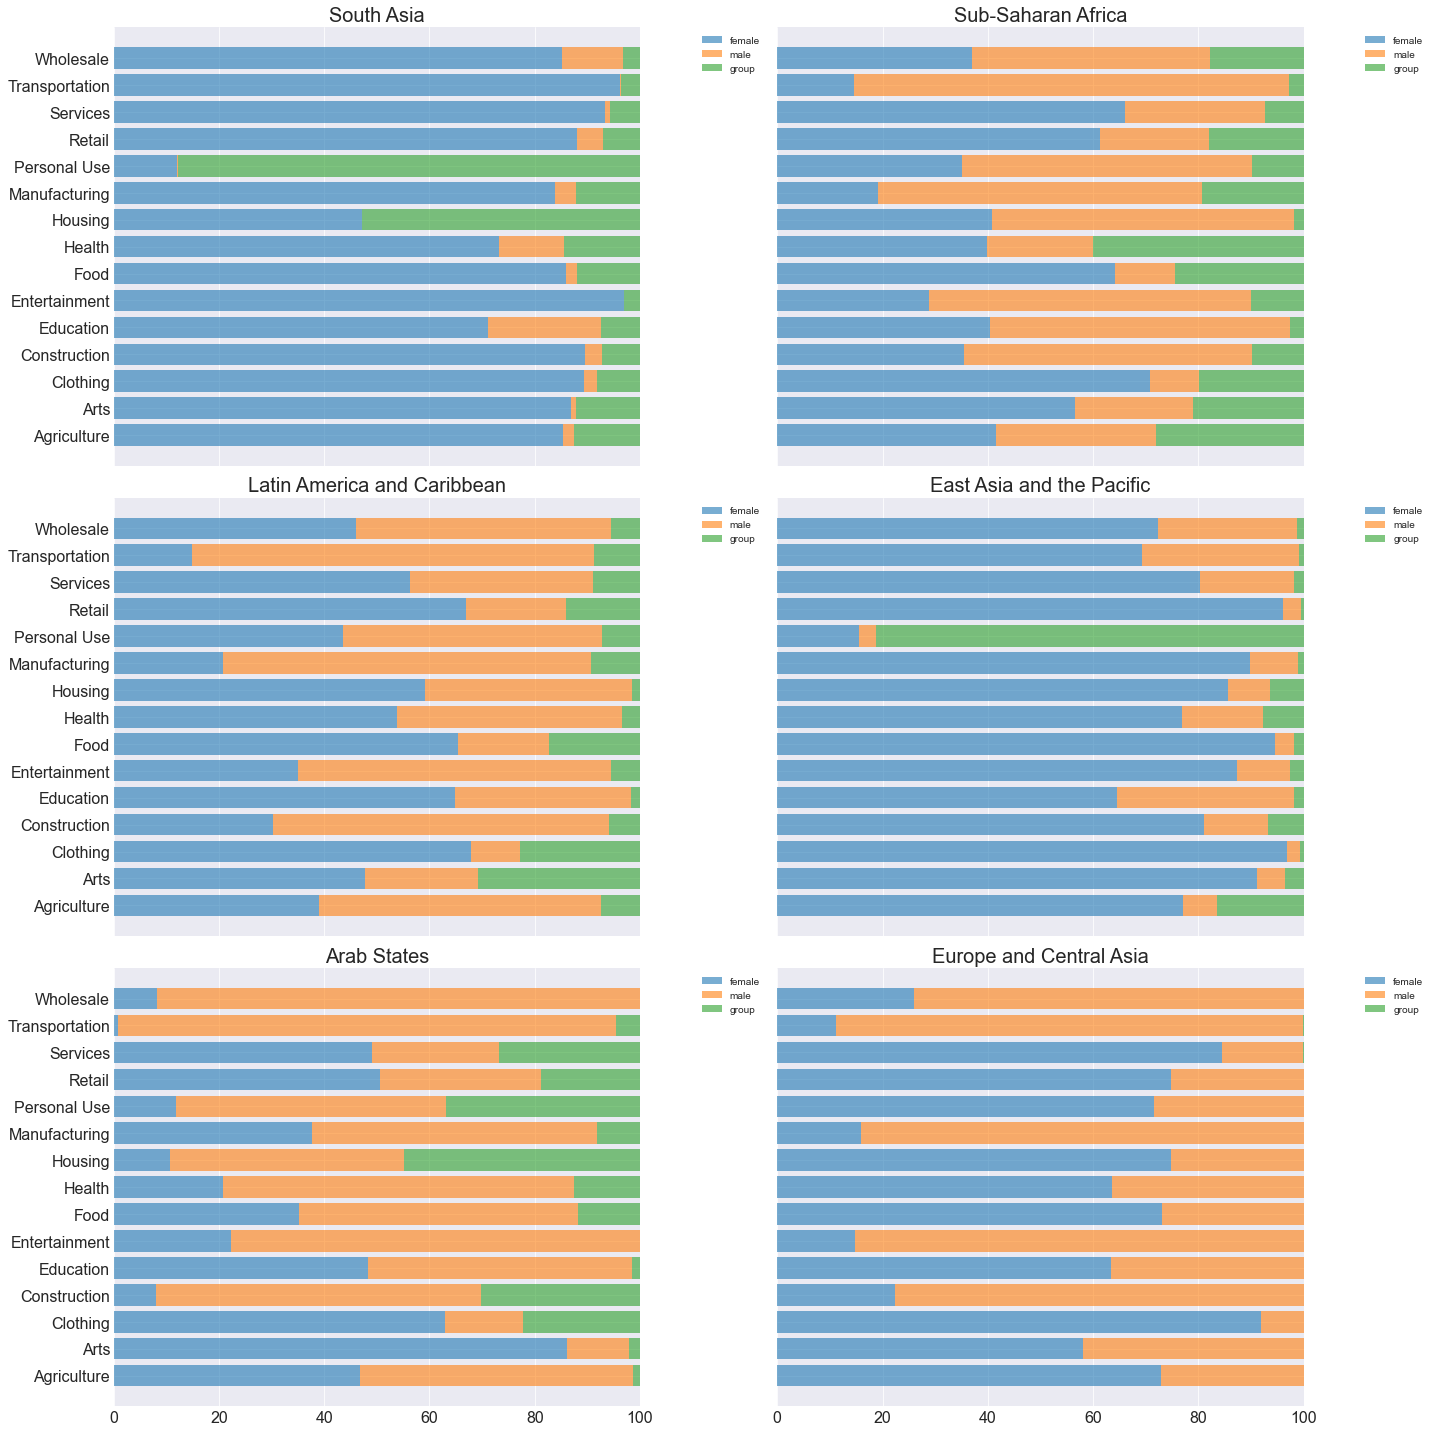

In [61]:
f,axes=plt.subplots(3, 2, sharey=True, sharex=True, figsize=(20,20))


j = 0

for i in range(3):
    for k in range(2):
        ax = axes[i][k]
        
        region = WRGS_regions[j]
        
        ax.barh(WRGS_percent_dict[region].index.tolist(),
                WRGS_percent_dict[region]['female'],
                alpha=0.6,
                label= 'female')
        ax.barh(WRGS_percent_dict[region].index.tolist(),
                WRGS_percent_dict[region]['male'],
                alpha=0.6,
                label = 'male',
                left=WRGS_percent_dict[region]['female'])
        ax.barh(WRGS_percent_dict[region].index.tolist(),
                WRGS_percent_dict[region]['group'],
                alpha=0.6,
                label = 'group',
                left=(WRGS_percent_dict[region]['female'] + WRGS_percent_dict[region]['male']))     

        ax.set_title(region, fontsize=20)
        ax.set_ylabel(None)
        ax.tick_params(labelsize=16)
        ax.legend(bbox_to_anchor=(1.1, 1))        
        j += 1
    
plt.tight_layout()
plt.show()

## Заключение:

# Влияние такого атрибута займа, как Количество кредиторов (lender_count), на суммы и сроки займов.

In [62]:
df_TLL = df_kiva_loans[['term_in_months', 'loan_amount', 'lender_count']][df_kiva_loans['loan_amount'] < 60000].dropna()
# из раннего анализа было ясно, что заём на 100 000 был только один, остальные заемы были до 50 000

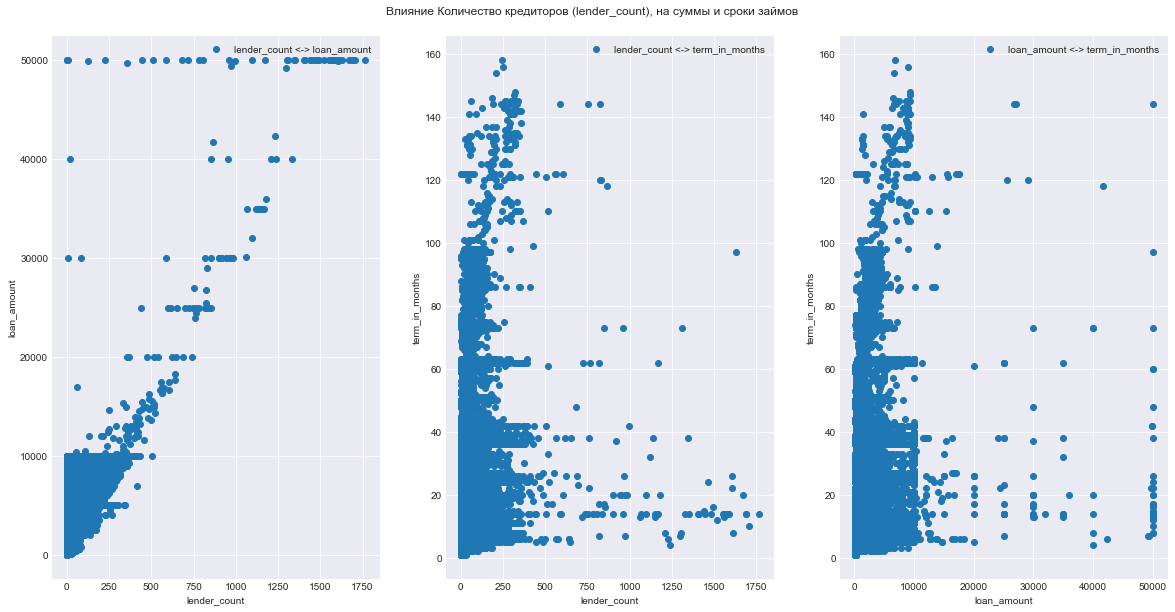

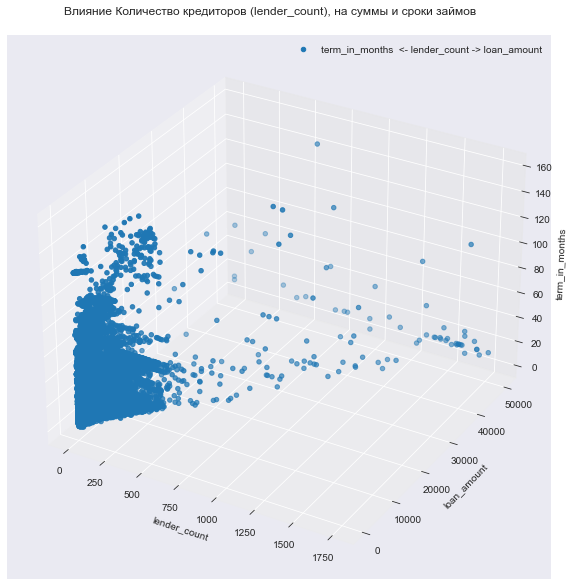

In [63]:
fig, axs = plt.subplots(figsize=(20,10), nrows=1, ncols=3)

ax = axs[0]
ax.scatter(df_TLL['lender_count'], df_TLL['loan_amount'], label= 'lender_count <-> loan_amount')
ax.set_ylabel('loan_amount')
ax.set_xlabel('lender_count')
ax.legend()

ax = axs[1]
ax.scatter(df_TLL['lender_count'], df_TLL['term_in_months'], label= 'lender_count <-> term_in_months')   
ax.set_ylabel('term_in_months')
ax.set_xlabel('lender_count')
ax.legend()

ax = axs[2]
ax.scatter(df_TLL['loan_amount'], df_TLL['term_in_months'], label= 'loan_amount <-> term_in_months')   
ax.set_ylabel('term_in_months')
ax.set_xlabel('loan_amount')
ax.legend()

fig.suptitle("Влияние Количество кредиторов (lender_count), на суммы и сроки займов", y=0.92)
plt.show()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_TLL['lender_count'], df_TLL['loan_amount'], df_TLL['term_in_months'],
           label= 'term_in_months  <- lender_count -> loan_amount')
ax.set_ylabel('loan_amount')
ax.set_xlabel('lender_count')
ax.set_zlabel('term_in_months')
ax.legend()

fig.suptitle("Влияние Количество кредиторов (lender_count), на суммы и сроки займов", y=0.92)
plt.show()

## Заключение:

# Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.

In [64]:
# df_kiva_loans.head(2)

#### Построим области распределения суммы кредита и срока кредита (средней и медианной величины) от многомерного индекса бедности:

In [65]:
df_MPI_inf_loan_amount = df_kiva_loans[['MPI', 'country', 'loan_amount']].dropna()
# Наблюдаемое отклонение от среднего
dev = (df_MPI_inf_loan_amount['loan_amount']-df_MPI_inf_loan_amount['loan_amount'].mean()).abs()
# Стандартное отклонение
std = df_MPI_inf_loan_amount['loan_amount'].std()
# Фильтруем исходный набор данных
df_MPI_inf_loan_amount_trimmed = df_MPI_inf_loan_amount[~(dev>3*std)]

df_MPI_inf_loan_amount_median = df_MPI_inf_loan_amount_trimmed.groupby('country').agg('median')
df_MPI_inf_loan_amount_mean = df_MPI_inf_loan_amount_trimmed.groupby('country').agg('mean')


df_MPI_inf_term = df_kiva_loans[['MPI', 'country', 'term_in_months']].dropna()
# Наблюдаемое отклонение от среднего
dev = (df_MPI_inf_term['term_in_months']-df_MPI_inf_term['term_in_months'].mean()).abs()
# Стандартное отклонение
std = df_MPI_inf_term['term_in_months'].std()
# Фильтруем исходный набор данных
df_MPI_inf_term_trimmed = df_MPI_inf_term[~(dev>3*std)]

df_MPI_inf_term_median = df_MPI_inf_term_trimmed.groupby('country').agg('median')
df_MPI_inf_term_mean = df_MPI_inf_term_trimmed.groupby('country').agg('mean')

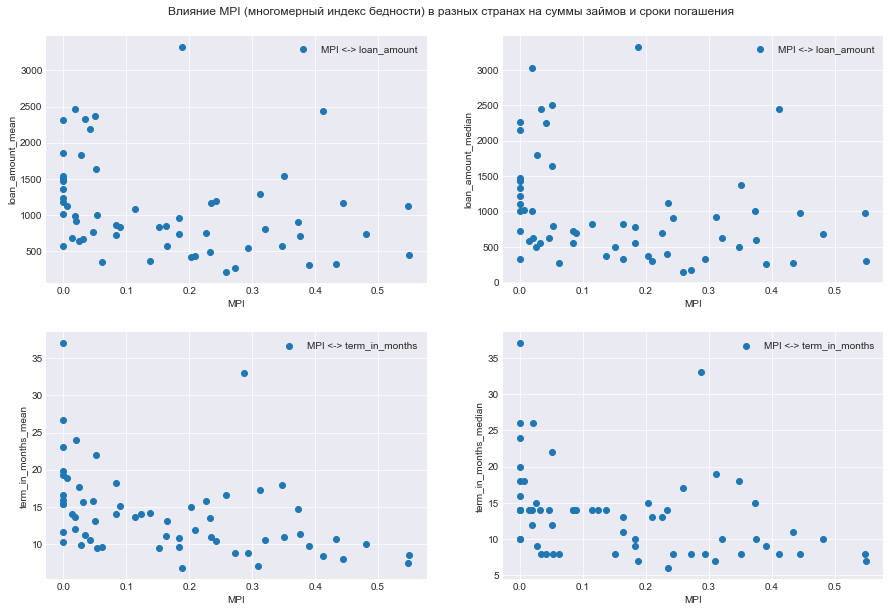

In [66]:
fig, axs = plt.subplots(figsize=(15,10), nrows=2, ncols=2)

ax = axs[0][0]
ax.scatter(df_MPI_inf_loan_amount_mean['MPI'], df_MPI_inf_loan_amount_mean['loan_amount'], label= 'MPI <-> loan_amount')
ax.set_ylabel('loan_amount_mean')
ax.set_xlabel('MPI')
ax.legend()

ax = axs[1][0]
ax.scatter(df_MPI_inf_term_mean['MPI'], df_MPI_inf_term_mean['term_in_months'], label= 'MPI <-> term_in_months')   
ax.set_ylabel('term_in_months_mean')
ax.set_xlabel('MPI')
ax.legend()

ax = axs[0][1]
ax.scatter(df_MPI_inf_loan_amount_median['MPI'], df_MPI_inf_loan_amount_median['loan_amount'], label= 'MPI <-> loan_amount')
ax.set_ylabel('loan_amount_median')
ax.set_xlabel('MPI')
ax.legend()

ax = axs[1][1]
ax.scatter(df_MPI_inf_term_median['MPI'], df_MPI_inf_term_median['term_in_months'], label= 'MPI <-> term_in_months')   
ax.set_ylabel('term_in_months_median')
ax.set_xlabel('MPI')
ax.legend()

fig.suptitle("Влияние MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения", y=0.92)
plt.show()

## Заключение:

# Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе макрорегионов

In [67]:
# df_kiva_loans.head(5)

In [68]:
df_WR_metrics = df_kiva_loans[[
    'world_region', 'loan_amount', 'term_in_months', 'posted_time', 'disbursed_time', 'funded_time']].dropna()
df_WR_metrics['monthly_repayment'] = df_WR_metrics['loan_amount'] / df_WR_metrics['term_in_months']
# Наблюдаемое отклонение от среднего
dev = (df_WR_metrics['loan_amount']-df_WR_metrics['loan_amount'].mean()).abs()
# Стандартное отклонение
std = df_WR_metrics['loan_amount'].std()
# Фильтруем исходный набор данных
df_WR_metrics_trimmed_1 = df_WR_metrics[~(dev>3*std)]

# drop na (missing) values
df_WR_metrics_trimmed_1 = df_WR_metrics_trimmed_1.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)
# dates columns:
dates = ['posted_time','disbursed_time']
# format dates:
df_WR_metrics_trimmed_1[dates] = df_WR_metrics_trimmed_1[dates].applymap(lambda x : x.split('+')[0])
df_WR_metrics_trimmed_1[dates] = df_WR_metrics_trimmed_1[dates].apply(pd.to_datetime)
# calculate time interval
df_WR_metrics_trimmed_1.loc[:, 'time_funding'] = \
    df_WR_metrics_trimmed_1['disbursed_time']-df_WR_metrics_trimmed_1['posted_time']
df_WR_metrics_trimmed_1.loc[:, 'time_funding'] = df_WR_metrics_trimmed_1['time_funding'] / timedelta(days=1)
# remove outliers +-3 sigma
dev = (df_WR_metrics_trimmed_1['time_funding']-df_WR_metrics_trimmed_1['time_funding'].mean()).abs()
std = df_WR_metrics_trimmed_1['time_funding'].std()
# Keep rows where time_funding interval > 0 only
df_WR_metrics_trimmed_2 = df_WR_metrics_trimmed_1[~(dev>3*std) & (df_WR_metrics_trimmed_1.loc[:, 'time_funding']>0)]

df_WR_metrics_trimmed_2 = df_WR_metrics_trimmed_2.drop(['posted_time', 'disbursed_time', 'funded_time'], axis=1)

# df_WR_metrics_trimmed_2.head(2)

In [69]:
WR_metrics_regions = pd.unique(df_WR_metrics_trimmed_2['world_region']).tolist()

WR_metrics_dict = {}

for region in WR_metrics_regions:
    WR_metrics_dict[region] = \
    df_WR_metrics_trimmed_2[['loan_amount', 'term_in_months', 'monthly_repayment', 'time_funding']][
        df_WR_metrics_trimmed_2['world_region'] == region]
# WR_metrics_dict['Sub-Saharan Africa']

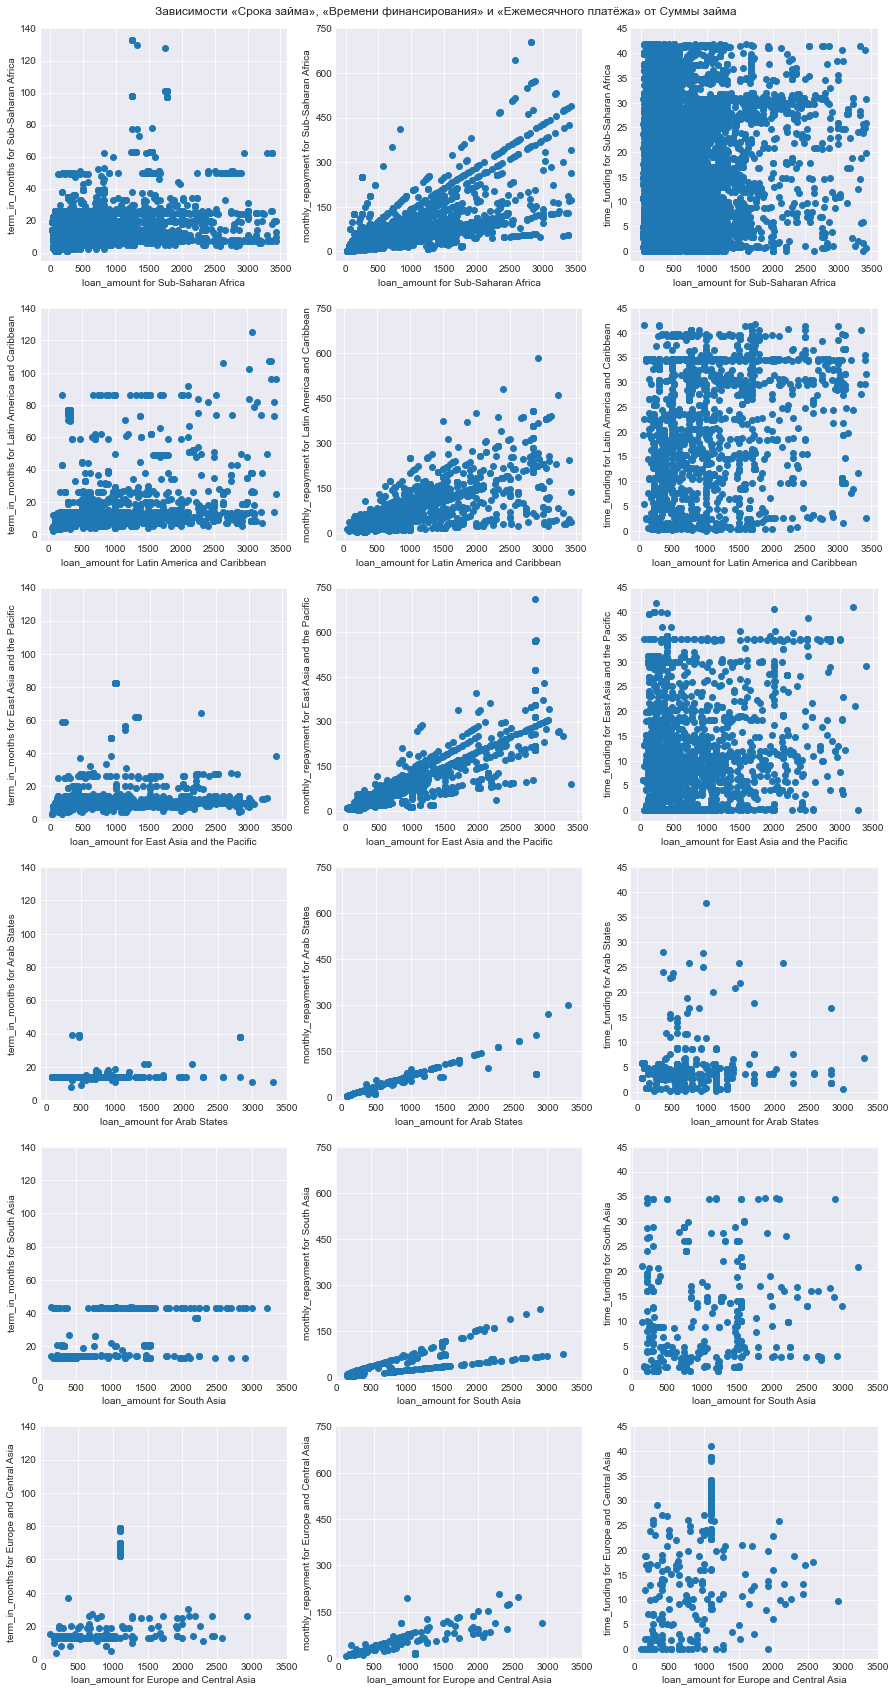

In [70]:
WR_metrics_colums = ['term_in_months', 'monthly_repayment', 'time_funding']

i = 0
j = 0

fig, axs = plt.subplots(figsize=(15,30), nrows=len(WR_metrics_regions), ncols=len(WR_metrics_colums))

for region in WR_metrics_regions:
    j = 0
    for value in WR_metrics_colums:
        ax = axs[i][j]
        ax.scatter(
            WR_metrics_dict[region]['loan_amount'],
            WR_metrics_dict[region][value])
        
        ax.set_ylabel(value + ' for ' + region)
        ax.set_xlabel('loan_amount for ' + region)
        ax.set_xticks(np.arange(0, 3600, 500))
        if j == 0:
            ax.set_yticks(np.arange(0, 150, 20))
        elif j == 1:
            ax.set_yticks(np.arange(0, 760, 150))
        elif j == 2:
            ax.set_yticks(np.arange(0, 46, 5))
        j += 1
    i += 1

    
fig.suptitle("Зависимости «Срока займа», «Времени финансирования» и «Ежемесячного платёжа» от Суммы займа", y=0.89)
plt.show()

## Заключение: